In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds 

In [18]:
datos , metadatos = tfds.load("mnist",as_supervised=True,with_info=True)


In [19]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\k_ev_\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [20]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [21]:
nombres_clases = metadatos.features["label"].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [22]:
datos_entrenamiento

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [23]:
# Normalización
#0 --> 0 y 255 --> 1

# Función para normalizar los datos
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32) / 255.0
    return imagen, etiqueta

# Aplicar la normalización
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas  = datos_pruebas.map(normalizar)

In [24]:
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

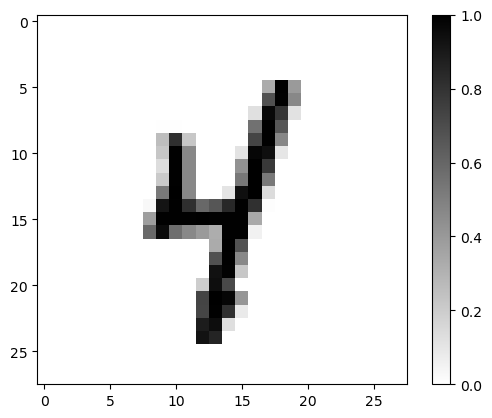

In [25]:
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()


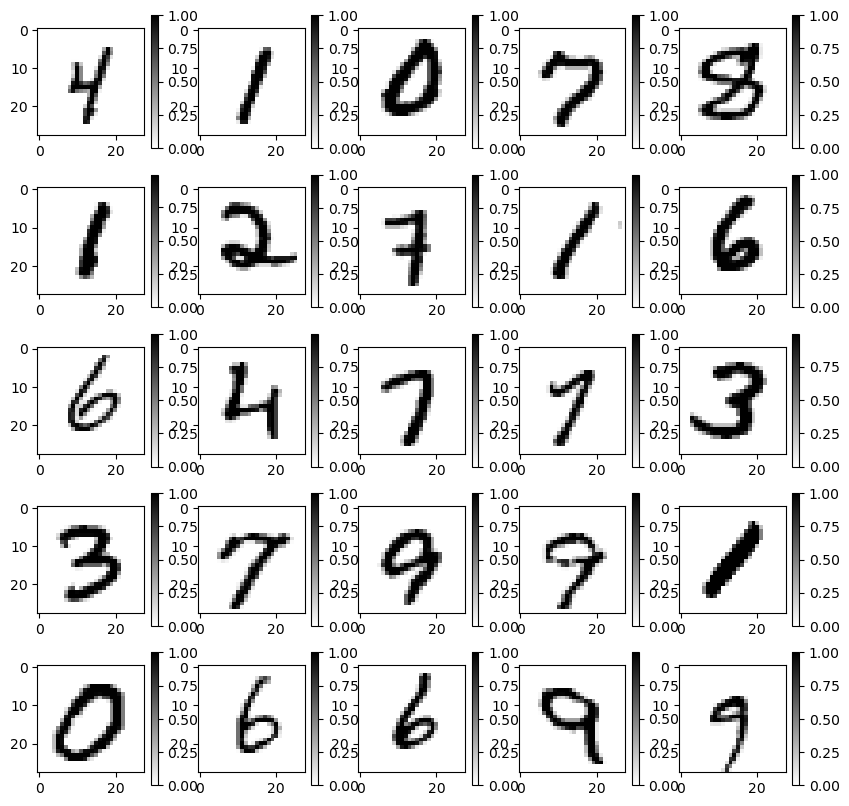

In [26]:
plt.figure(figsize=(10,10))
for i,(imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    plt.subplot(5,5,i+1)
    plt.imshow(imagen,cmap=plt.cm.binary)
    plt.colorbar()

plt.show()


In [27]:
modelo = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [28]:
modelo.compile(
    optimizer = "adam",
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [29]:
TAMANIO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(6000).batch(TAMANIO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANIO_LOTE)



In [30]:
import math

entrenamiento = modelo.fit(
    datos_entrenamiento, epochs = 10,
    steps_per_epoch = math.ceil(60000/TAMANIO_LOTE)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8463 - loss: 0.5215
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9543 - loss: 0.1540
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9682 - loss: 0.1101
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.9735 - loss: 0.0887
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.9770 - loss: 0.0729
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9807 - loss: 0.0614
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.9835 - loss: 0.0522
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.9869 - loss: 0.0441
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9880 - loss: 0.0381
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9888 - loss: 0.0334


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


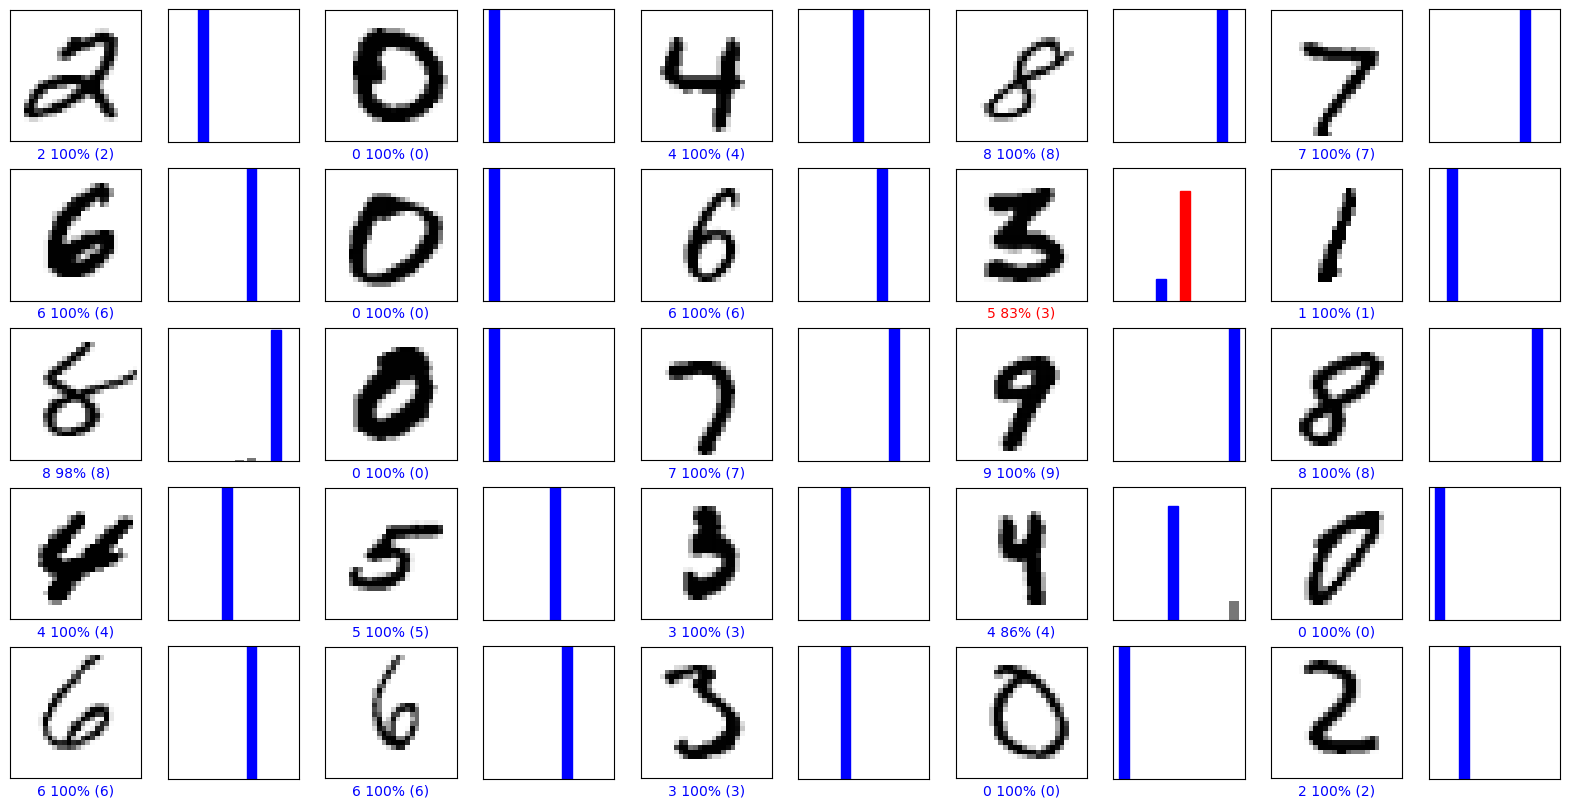

In [31]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)